# <u>LINEAR REGRESSION PROJECT - Salary Prediction Model</u>

## 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Load data

In [2]:
data = pd.read_csv("salary data.csv")

## 3. Data Preparation

In [3]:
data.info

<bound method DataFrame.info of       Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
368  35.0     NaN      Bachelor's       Senior Marketing Analyst   
369  43.0    Male        Master's         Director of Operations   
370  29.0  Female      Bachelor's         Junior Project Manager   
371  34.0    Male      Bachelor's  Senior Operations Coordinator   
372  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience  Salary  
0                    5.0   90000  
1                    3.0   65000  
2                   15.0  150000  
3          

In [4]:
# Checking data size
data.shape

(373, 6)

In [5]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000
1,28.0,Female,Master's,Data Analyst,3.0,65000
2,45.0,Male,PhD,Senior Manager,15.0,150000
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000
4,52.0,Male,Master's,Director,20.0,200000


In [6]:
data.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                   int64
dtype: object

In [7]:
# Converting Salary into float datatype
data['Salary']=data['Salary'].astype('float')

In [8]:
data.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [9]:
# dataframe with categorical features
data.describe(include=['object'])

,Gender,Education Level,Job Title
count,365,362,358
unique,2,3,169
top,Male,Bachelor's,Director of Operations
freq,191,216,11


In [10]:
# dataframe with numerical features
data.describe(include=['float'])

,Age,Years of Experience,Salary
count,368.000000,367.000000,373.000000
mean,37.432065,10.059946,100577.345845
std,7.075363,6.540475,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


### Splitting Target Variable

In [11]:
target = data['Salary']
target.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

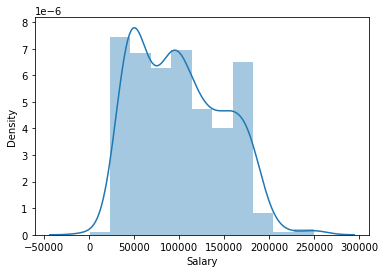

In [12]:
# Visualizing the distribution of Price(dependent) variable
import seaborn as sns
sns.distplot(target,hist=True)

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

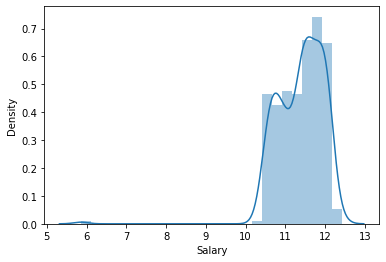

In [13]:
#Log Transformaton
target_log = np.log(target)
sns.distplot(target_log,hist=True)

array([[<AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'Log Salary'}>]], dtype=object)

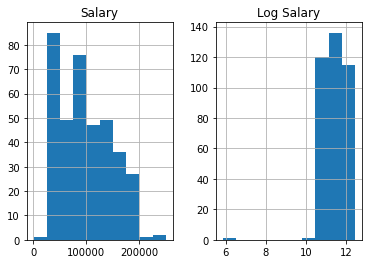

In [14]:
import matplotlib
salaries = pd.DataFrame({"Salary":data['Salary'],"Log Salary":target_log})
salaries.hist()

In [15]:
# drop target variable from dataset
raw_data = data
data = data.drop(["Salary"],axis=1)
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,Male,Bachelor's,Software Engineer,5.0
1,28.0,Female,Master's,Data Analyst,3.0
2,45.0,Male,PhD,Senior Manager,15.0
3,36.0,Female,Bachelor's,Sales Associate,7.0
4,52.0,Male,Master's,Director,20.0


In [16]:
# save all categorical columns in list
categorical_columns = [col for col in data.columns.values if data[col].dtype == 'object']

# dataframe with categorical features
data_cat = data[categorical_columns]
# dataframe with numerical features
data_num = data.drop(categorical_columns, axis=1)

In [17]:
# Using describe function in numeric dataframe
data_num.describe()

,Age,Years of Experience
count,368.000000,367.000000
mean,37.432065,10.059946
std,7.075363,6.540475
min,23.000000,0.000000
25%,31.000000,4.000000
50%,36.000000,9.000000
75%,44.000000,15.000000
max,53.000000,25.000000


In [18]:
# Printig 5 head observation in categorical dataframe
data_cat.head()

,Gender,Education Level,Job Title
0,Male,Bachelor's,Software Engineer
1,Female,Master's,Data Analyst
2,Male,PhD,Senior Manager
3,Female,Bachelor's,Sales Associate
4,Male,Master's,Director


### Reduce Skewness for Numeric Features

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Years of Experience'}>]],
      dtype=object)

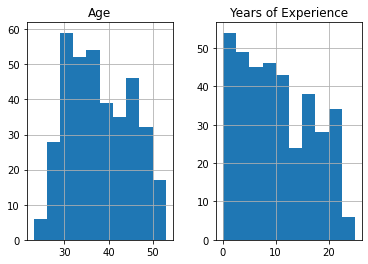

In [19]:
data_num.hist()

- If skewness is less than -1 or greater than +1, the distribution is highly skewed.
- If skewness is between -1 and -1/2 or between +1/2 and +1, the distribution is moderately skewed.
- If skewness is between -1/2 and +1/2, the distribution is approximately skewed.

In [20]:
from scipy.stats import skew
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
print(data_num_skew)
data_num_skew = data_num_skew[data_num_skew > .75]

# Apply log + 1 transformation for all numeric features with skewness over 0.75
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

Age                    0.203716
Years of Experience    0.363499
dtype: float64


In [21]:
# List of variables has skewness more than 0.75
data_num_skew

Series([], dtype: float64)

In [22]:
# No numerical variable has skewness more than 0.75.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Years of Experience'}>]],
      dtype=object)

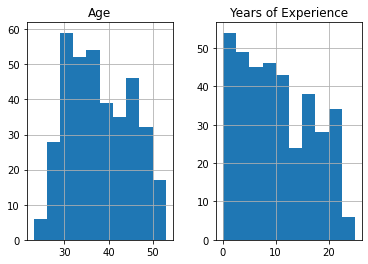

In [23]:
# Ploting histogram after removing variables having skewness more than 0.75 .
data_num.hist()

### Mean Normalization
#### Normalization usually means to scale a variable to have values between 0 and 1.
#### Formula: x normalized = $ \frac{x - x mean}{x max - x min)} $

In [24]:
data_num = ((data_num - data_num.mean())/(data_num.max() - data_num.min()))
data_num.describe()

,Age,Years of Experience
count,3.680000e+02,3.670000e+02
mean,-1.116257e-17,-3.297393e-17
std,2.358454e-01,2.616190e-01
min,-4.810688e-01,-4.023978e-01
25%,-2.144022e-01,-2.423978e-01
50%,-4.773551e-02,-4.239782e-02
75%,2.189312e-01,1.976022e-01
max,5.189312e-01,5.976022e-01


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Years of Experience'}>]],
      dtype=object)

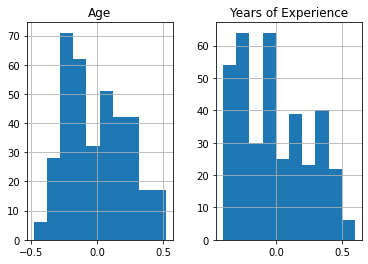

In [25]:
data_num.hist()

#### After Mean Normalization the scale will change and it will not affect original data distribution.

## 4. Missing Data Analysis
#### If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where missing values are present. 

<AxesSubplot:>

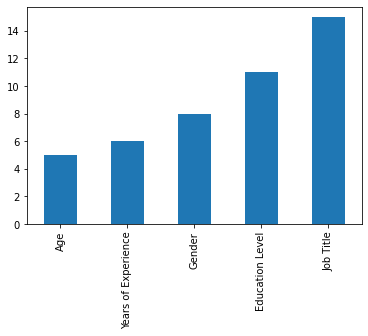

In [26]:
null_in_Salary = data.isnull().sum()
null_in_Salary = null_in_Salary[null_in_Salary > 0]
null_in_Salary.sort_values(inplace=True)
null_in_Salary.plot.bar()

In [27]:
# Printing total numbers and percentage of missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(15)

,Total,Percent
Job Title,15,0.040214
Education Level,11,0.029491
Gender,8,0.021448
Years of Experience,6,0.016086
Age,5,0.013405


### Handling Missing Values in Numerical Columns

In [28]:
# The shape attribute for numpy arrays returns the dimensions of the array.
# If Y has n rows and m columns, then Y.shape is (n,m). So Y.shape[0] is n.
data_len = data_num.shape[0]
print(data_len)

for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    
    # drop values if there is more than 50 missing values
    if missing_values > 50:
        data_num = data_num.drop(col,axis = 1)
    # if there is less than 50 missing values then fill in with median value of column
    else:
        data_num = data_num.fillna(data_num[col].median())

373


### Handling Missing Values in Categorical Columns
- Here we do data imputation. If the number of missing values is more than 50, we drop the column from analysis.

In [29]:
# Y shape is (n,m)
data_len = data_cat.shape[0]
print(data_len)

for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    
    # drop values if there is more than 50 missing values
    if missing_values > 50:
        print("droping column: {}".format(col))
        data_cat = data_cat.drop(col,axis = 1)
    else:
        pass

373


In [30]:
data_cat.describe()

,Gender,Education Level,Job Title
count,365,362,358
unique,2,3,169
top,Male,Bachelor's,Director of Operations
freq,191,216,11


### Dummy Coding

In [31]:
# Using pandas.get_dummies function to convert categorical variable into dummy/indicator variables
data_cat_dummies = pd.get_dummies(data_cat,drop_first=True)

In [32]:
# Viewing dimensionality of the DataFrame
data_cat_dummies.head()

,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,Job Title_CEO,Job Title_Chief Data Officer,Job Title_Chief Technology Officer,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
print("Numerical features :" + str(len(data_num.columns)))
print("Categorical features :" + str(len(data_cat_dummies.columns)))

Numerical features :2
Categorical features :171


In [34]:
# using concat function we merge two dataframe for further analysis
newdata = pd.concat([data_num, data_cat_dummies],axis=1)

## 5. Exploratory Data Analysis

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


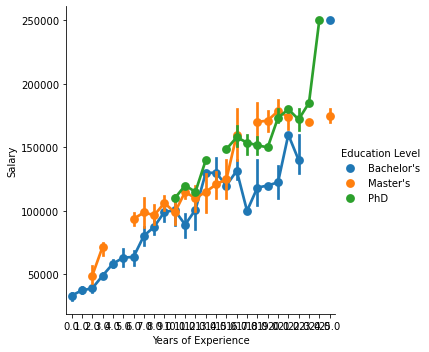

In [35]:
import seaborn as sns
# A Factor plot is simply the same plot generated for different response and factor variables and arranged on a single page.
sns.factorplot("Years of Experience","Salary",data=raw_data,hue="Education Level")

In [36]:
# As the Years of Experience increases, the salaries increases. 
# Also, if the Education level changes from Bachelor's to Phd,the salaries increases.

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


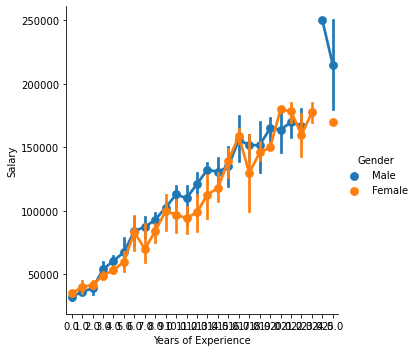

In [37]:
import seaborn as sns
# A Factor plot is simply the same plot generated for different response and factor variables and arranged on a single page.
sns.factorplot("Years of Experience","Salary",data=raw_data,hue="Gender")

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education Level', ylabel='Salary'>

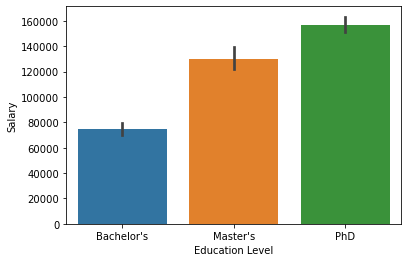

In [38]:
sns.barplot(raw_data['Education Level'],raw_data['Salary'])

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Salary'>

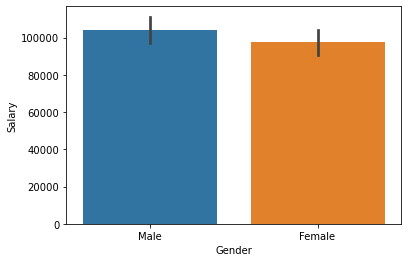

In [39]:
sns.barplot(raw_data['Gender'],raw_data['Salary'])

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Education Level', ylabel='Salary'>

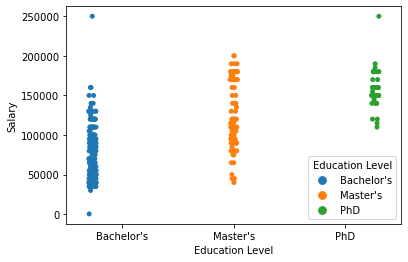

In [40]:
sns.stripplot(x="Education Level", y="Salary", data=raw_data, hue="Education Level", jitter=True, split=True )

In [41]:
# Education level increases the salaries as it moves from Bachelor's (to Master's) to PhD.

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='Salary'>

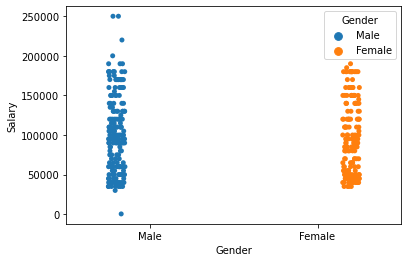

In [42]:
sns.stripplot(x="Gender", y="Salary", data=raw_data, hue="Gender", jitter=True, split=True )

In [43]:
# Gender doesn't affect the salaries(approximately).

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education Level', ylabel='Salary'>

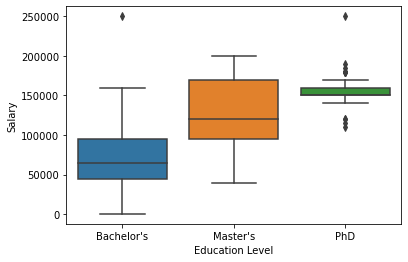

In [44]:
sns.boxplot(raw_data['Education Level'],raw_data['Salary'])

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Salary'>

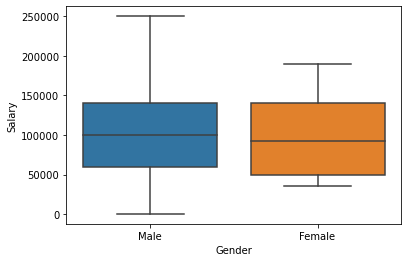

In [45]:
sns.boxplot(raw_data['Gender'],raw_data['Salary'])

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education Level', ylabel='Salary'>

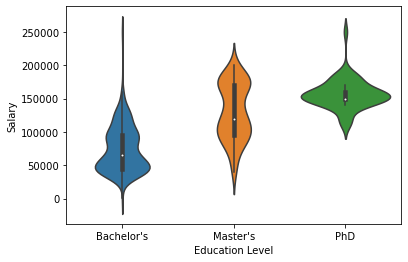

In [46]:
sns.violinplot(raw_data['Education Level'],raw_data['Salary'])

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Salary'>

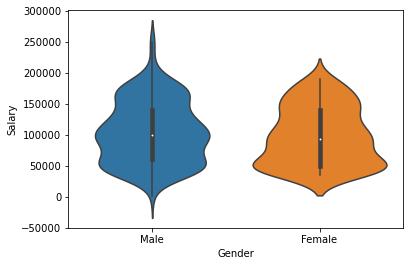

In [47]:
sns.violinplot(raw_data['Gender'],raw_data['Salary'])

### Correlation Plot

                          Age  Years of Experience
Age                  1.000000             0.967299
Years of Experience  0.967299             1.000000


Text(0.5, 1.0, 'Correlation between features')

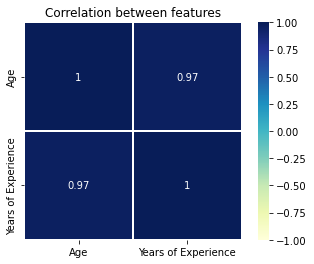

In [48]:
# Ploting correlation plot
import matplotlib.pyplot as plt
# method : pearson : standard correlation coefficient, kendall : Kendall Tau correlation coefficient, spearman : Spearman rank correlation coefficient
corr=data_num.corr()
print(corr)

sns.heatmap(corr,
           cmap='YlGnBu',vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True,square=True);
plt.title('Correlation between features')

# 0.0 - 0.2 -> Weak Correlation
# 0.3 - 0.6 -> Moderate Correlation
# 0.7 - 1.0 -> Strong Correlation
# 1 perfect positive
# -1 perfect negative

## 6. Linear Regression Modeling
### 6.1 Preparartion of Datasets
- Split the dataset into Train & Test

In [49]:
# Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(newdata, target_log, test_size = 0.30, random_state = 0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (261, 173)
x_test (112, 173)
y_train (261,)
y_test (112,)


### 6.2 Building a Linear Regression Base Model

In [50]:
# Lets build Linear Regression model using statsmodels
import statsmodels.api as sm

# Building Linear Regression model using OLS
model1 = sm.OLS(y_train, x_train).fit()
# Note the swap of X and Y

In [50]:
# Printing Linear Regression Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              29.34
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                    2.63e-58
Time:                        15:37:00   Log-Likelihood:                         -548.08
No. Observations:                 261   AIC:                                      1370.
Df Residuals:                     124   BIC:                                      1859.
Df Model:                         137                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Age                                                 9.3908      5.169      1.817      0.072      -0.841      19.622
Years of Experience                               -10.0714      5.116     -1.969      0.051     -20.197       0.054
Gender_Male                                         2.1942      0.558      3.932      0.000       1.090       3.299
Education Level_Master's                            2.9868      0.832      3.590      0.000       1.340       4.633
Education Level_PhD                                 5.0714      1.382      3.668      0.000       2.335       7.808
Job Title_Administrative Assistant                 10.3328      2.875      3.594      0.000       4.643      16.023
Job Title_Business Analyst                          9.1857      2.931      3.134      0.002       3.385      14.986
Job Title_Business Development Manager           -2.38e-16   9.87e-15     -0.024      0.981   -1.98e-14    1.93e-14
Job Title_Business Intelligence Analyst             6.3240      3.011      2.100      0.038       0.364      12.284
Job Title_CEO                                      12.3196      3.238      3.804      0.000       5.910      18.729
Job Title_Chief Data Officer                       10.4442      2.968      3.518      0.001       4.569      16.319
Job Title_Chief Technology Officer                  6.2193      3.340      1.862      0.065      -0.392      12.830
Job Title_Content Marketing Manager                10.3974      2.924      3.556      0.001       4.610      16.185
Job Title_Copywriter                             4.297e-15   2.71e-15      1.588      0.115   -1.06e-15    9.65e-15
Job Title_Customer Service Manager                 10.8174      2.118      5.106      0.000       6.624      15.010
Job Title_Customer Service Rep                      5.6037      3.256      1.721      0.088      -0.841      12.048
Job Title_Customer Service Representative          12.2471      3.001      4.080      0.000       6.306      18.188
Job Title_Customer Success Manager                  8.1079      2.984      2.717      0.008       2.202      14.014
Job Title_Customer Success Rep                     10.5253      2.973      3.541      0.001       4.642      16.409
Job Title_Data Analyst                          -1.145e-14   4.45e-15     -2.575      0.011   -2.02e-14   -2.65e-15
Job Title_Data Entry Clerk                         10.3020      2.993      3.442      0.001       4.379      16.225
Job Title_Digital Content Producer              -1.999e-14   5.18e-15     -3.861      0.000   -3.02e-14   -9.74e-15
Job Title_Digital Marketing Manager             -1.549e-14   3.98e-15     -3.896    

#### RMSE stands for Root Mean Squared Error. 
- RMSE= $ \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $
- It provides a measure of the model's prediction accuracy, where lower values indicate better performance. 

In [51]:
def rmse(predictions, targets):
    differences = predictions - targets
    differences_squared = differences**2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt(mean_of_differences_squared)
    return rmse_val

In [52]:
cols = ['Model','R-Squared value','Adj. R-Squared Value','RMSE']
models_report = pd.DataFrame(columns = cols)
# Predicting the model on test data
predictions1 = model1.predict(x_test)

In [53]:
tmp1 = pd.Series({'Model':"Base Linear Regression Model",
                 'R-Squared Value' : model1.rsquared,
                 'Adj R-Squared Value' : model1.rsquared_adj,
                 'RMSE':rmse(predictions1, y_test)})
print(tmp1)

Model                  Base Linear Regression Model
R-Squared Value                            0.970071
Adj R-Squared Value                        0.937004
RMSE                                       5.878999
dtype: object


### 6.3 Building Model with Constant

In [54]:
df_constant = sm.add_constant(newdata)

In [55]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df_constant, target_log, test_size = 0.30, random_state = 0)

In [56]:
# Lets build Linear Regression model using statsmodels
import statsmodels.api as sm

# Building Linear Regression model using OLS
model2 = sm.OLS(y_train1, x_train1).fit()
# Note the swap of X and Y

In [57]:
# Printing Linear Regression Summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     6.306
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.47e-22
Time:                        18:39:43   Log-Likelihood:                 27.554
No. Observations:                 261   AIC:                             220.9
Df Residuals:                     123   BIC:                             712.8
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              11.4828      0.115    100.032      0.000      11.256      11.710
Age                                                 0.8473      0.578      1.465      0.145      -0.297       1.992
Years of Experience                                 0.4231      0.576      0.735      0.464      -0.716       1.563
Gender_Male                                        -0.0480      0.066     -0.731      0.466      -0.178       0.082
Education Level_Master's                            0.0562      0.097      0.581      0.562      -0.135       0.247
Education Level_PhD                                 0.1121      0.161      0.697      0.487      -0.206       0.430
Job Title_Administrative Assistant                 -0.6931      0.337     -2.059      0.042      -1.359      -0.027
Job Title_Business Analyst                         -0.0326      0.337     -0.097      0.923      -0.700       0.635
Job Title_Business Development Manager          -1.244e-15    4.8e-16     -2.591      0.011    -2.2e-15   -2.94e-16
Job Title_Business Intelligence Analyst             0.0364      0.339      0.107      0.915      -0.635       0.708
Job Title_CEO                                       0.3866      0.378      1.024      0.308      -0.361       1.134
Job Title_Chief Data Officer                        0.5806      0.343      1.693      0.093      -0.098       1.259
Job Title_Chief Technology Officer                  0.2350      0.374      0.628      0.531      -0.506       0.976
Job Title_Content Marketing Manager                -0.2384      0.341     -0.700      0.485      -0.912       0.436
Job Title_Copywriter                             5.034e-16   4.21e-16      1.196      0.234    -3.3e-16    1.34e-15
Job Title_Customer Service Manager                 -0.2349      0.259     -0.906      0.366      -0.748       0.278
Job Title_Customer Service Rep                     -0.6613      0.366     -1.809      0.073      -1.385       0.062
Job Title_Customer Service Representative          -0.5665      0.356     -1.592      0.114      -1.271       0.138
Job Title_Customer Success Manager                 -0.4354      0.341     -1.277      0.204      -1.110       0.240
Job Title_Customer Success Rep                     -0.4100      0.347     -1.183      0.239      -1.096       0.276
Job Title_Data Analyst                          -3.284e-16   3.23e-16     -1.018      0.311   -9.67e-16     3.1e-16
Job Title_Data Entry Clerk                         -0.4983      0.348     -1.431      0.155      -1.188       0.191
Job Title_Digital Content Producer               1.014e-15   2.94e-16      3.451      0.001    4.33e-16     1.6e-15
Job Title_Digital Marketing Manager             -1.072e-15      4e-

In [58]:
# Predicting the model on test data
predictions2 = model2.predict(x_test1)

In [59]:
tmp2 = pd.Series({'Model':"Linear Regression Model with Constant",
                 'R-Squared Value' : model2.rsquared,
                 'Adj R-Squared Value' : model2.rsquared_adj,
                 'RMSE':rmse(predictions2, y_test1)})
print(tmp2)

Model                  Linear Regression Model with Constant
R-Squared Value                                     0.875374
Adj R-Squared Value                                 0.736564
RMSE                                                0.213706
dtype: object


#### <u>Multicollinearity</u>

1. Multicollinearity occurs when two or more predictor variables in regression model are highly correlated with each other.
2. The VIF quantifies how much the variance of the coefficient estimates are inflated due to multicollinearity.
#### VIF= $ \frac{1}{1 - R_{i}^2} $
3. A thumb rule for interpreting the variance inflation factor:
- 1 = not correlated
- Between 1 and 5 = moderately correlated
- Greater than 5 = highy correlated

### 6.4 Calculating Variance Inflation Factor(VIF)

In [60]:
print ("\nVariance Inflation Factor")
cnames = x_train1.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train1[yvar],(x_train1[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar,round(vif,3))


Variance Inflation Factor
const 34.19
Age 46.741
Years of Experience 58.141
Gender_Male 2.792
Education Level_Master's 4.433
Education Level_PhD 8.345
Job Title_Administrative Assistant 1.122
Job Title_Business Analyst 1.125
Job Title_Business Development Manager nan
Job Title_Business Intelligence Analyst 1.139
Job Title_CEO 1.412
Job Title_Chief Data Officer 1.164
Job Title_Chief Technology Officer 1.388
Job Title_Content Marketing Manager 1.149
Job Title_Copywriter nan


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regre

Job Title_Customer Service Manager 1.325
Job Title_Customer Service Rep 1.324
Job Title_Customer Service Representative 1.255
Job Title_Customer Success Manager 1.151
Job Title_Customer Success Rep 1.19
Job Title_Data Analyst nan
Job Title_Data Entry Clerk 1.201
Job Title_Digital Content Producer nan
Job Title_Digital Marketing Manager nan
Job Title_Director 1.313
Job Title_Director of Business Development nan
Job Title_Director of Engineering 1.415
Job Title_Director of Finance 1.211
Job Title_Director of HR nan
Job Title_Director of Human Capital 1.242
Job Title_Director of Human Resources 1.351
Job Title_Director of Marketing 2.319
Job Title_Director of Operations 2.783


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regre

Job Title_Director of Product Management 1.228
Job Title_Director of Sales 1.197
Job Title_Director of Sales and Marketing 1.335
Job Title_Event Coordinator nan
Job Title_Financial Advisor 1.164
Job Title_Financial Analyst nan
Job Title_Financial Manager 1.151
Job Title_Graphic Designer nan
Job Title_HR Generalist 1.278
Job Title_HR Manager 1.311
Job Title_Help Desk Analyst nan
Job Title_Human Resources Director nan
Job Title_IT Manager nan
Job Title_IT Support nan
Job Title_IT Support Specialist 1.124
Job Title_Junior Account Manager 1.269
Job Title_Junior Accountant 1.289
Job Title_Junior Advertising Coordinator nan
Job Title_Junior Business Analyst 1.682
Job Title_Junior Business Development Associate 1.559


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Job Title_Junior Business Operations Analyst 1.283
Job Title_Junior Copywriter 1.149
Job Title_Junior Customer Support Specialist nan
Job Title_Junior Data Analyst 1.124
Job Title_Junior Data Scientist nan
Job Title_Junior Designer 1.158
Job Title_Junior Developer 1.216
Job Title_Junior Financial Advisor 1.132
Job Title_Junior Financial Analyst 1.502
Job Title_Junior HR Coordinator nan
Job Title_Junior HR Generalist 1.261
Job Title_Junior Marketing Analyst 1.335
Job Title_Junior Marketing Coordinator 1.288
Job Title_Junior Marketing Manager 1.274
Job Title_Junior Marketing Specialist 1.487
Job Title_Junior Operations Analyst 1.284
Job Title_Junior Operations Coordinator 1.158
Job Title_Junior Operations Manager 1.396
Job Title_Junior Product Manager 1.402
Job Title_Junior Project Manager 1.412
Job Title_Junior Recruiter nan
Job Title_Junior Research Scientist nan
Job Title_Junior Sales Representative 1.56
Job Title_Junior Social Media Manager nan
Job Title_Junior Social Media Specialis

C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Job Title_Operations Manager nan
Job Title_Principal Engineer 1.329
Job Title_Principal Scientist nan
Job Title_Product Manager nan
Job Title_Product Marketing Manager nan
Job Title_Project Engineer nan
Job Title_Project Manager 1.214
Job Title_Public Relations Manager 1.16
Job Title_Recruiter 1.25
Job Title_Research Director 1.32
Job Title_Research Scientist 1.341
Job Title_Sales Associate 1.264
Job Title_Sales Director 1.269
Job Title_Sales Executive 1.251
Job Title_Sales Manager 1.237
Job Title_Sales Operations Manager 1.202
Job Title_Sales Representative 1.184
Job Title_Senior Account Executive 1.139
Job Title_Senior Account Manager 

C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


1.172
Job Title_Senior Accountant 1.218
Job Title_Senior Business Analyst 1.683
Job Title_Senior Business Development Manager 1.311
Job Title_Senior Consultant 1.274
Job Title_Senior Data Analyst 1.616
Job Title_Senior Data Engineer 1.554
Job Title_Senior Data Scientist 2.387
Job Title_Senior Engineer 1.278
Job Title_Senior Financial Advisor 1.36
Job Title_Senior Financial Analyst 1.477
Job Title_Senior Financial Manager 1.571
Job Title_Senior Graphic Designer 1.165
Job Title_Senior HR Generalist 1.162
Job Title_Senior HR Manager 1.379
Job Title_Senior HR Specialist 1.185
Job Title_Senior Human Resources Coordinator 1.124
Job Title_Senior Human Resources Manager 1.177
Job Title_Senior Human Resources Specialist 1.154
Job Title_Senior IT Consultant 1.342
Job Title_Senior IT Project Manager 1.144
Job Title_Senior IT Support Specialist nan
Job Title_Senior Manager 1.608
Job Title_Senior Marketing Analyst 1.738
Job Title_Senior Marketing Coordinator 1.348
Job Title_Senior Marketing Directo

C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Job Title_Senior Quality Assurance Analyst nan
Job Title_Senior Research Scientist 1.341
Job Title_Senior Sales Manager 1.392
Job Title_Senior Sales Representative 1.139
Job Title_Senior Scientist 1.57
Job Title_Senior Software Architect 1.151
Job Title_Senior Software Developer 1.134
Job Title_Senior Software Engineer 1.693
Job Title_Senior Training Specialist nan
Job Title_Senior UX Designer 1.591
Job Title_Social Media Manager 1.149
Job Title_Social Media Specialist 1.42
Job Title_Software Developer nan
Job Title_Software Engineer 1.124
Job Title_Software Manager nan
Job Title_Software Project Manager 1.116
Job Title_Strategy Consultant 1.151
Job Title_Supply Chain Analyst 1.277
Job Title_Supply Chain Manager nan
Job Title_Technical Recruiter 1.116
Job Title_Technical Support Specialist 1.151
Job Title_Technical Writer 1.163
Job Title_Training Specialist 1.139
Job Title_UX Designer 1.138
Job Title_UX Researcher nan
Job Title_VP of Finance 1.212
Job Title_VP of Operations nan
Job Tit

C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regre

#### Removing variable having VIF above 10

In [61]:
vif_10 = ['const','Age','Years of Experience']
# custom function to remove variables having higher VIF

to_keep = [x for x in x_train1 if x not in vif_10]
x_train2 = x_train1[to_keep]
x_train2.head()

,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,Job Title_CEO,Job Title_Chief Data Officer,Job Title_Chief Technology Officer,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
136,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 6.4.1 Building Model after removing VIF above 10

In [62]:
# Lets build Linear Regression model using statsmodels
import statsmodels.api as sm

# Building Linear Regression model using OLS

model3 = sm.OLS(y_train1, x_train2).fit()
# Note the swap of X and Y
# Printing Linear Regression Summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              29.31
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                    5.67e-59
Time:                        18:40:00   Log-Likelihood:                         -552.10
No. Observations:                 261   AIC:                                      1374.
Df Residuals:                     126   BIC:                                      1855.
Df Model:                         135                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Gender_Male                                         2.1575      0.559      3.861      0.000       1.052       3.263
Education Level_Master's                            2.3006      0.761      3.024      0.003       0.795       3.806
Education Level_PhD                                 3.9902      1.277      3.125      0.002       1.463       6.517
Job Title_Administrative Assistant                 10.7144      2.888      3.710      0.000       5.000      16.429
Job Title_Business Analyst                          9.0678      2.941      3.083      0.003       3.247      14.889
Job Title_Business Development Manager           -1.91e-14   3.87e-15     -4.938      0.000   -2.68e-14   -1.14e-14
Job Title_Business Intelligence Analyst             6.8924      3.011      2.289      0.024       0.934      12.851
Job Title_CEO                                      10.2717      2.941      3.492      0.001       4.451      16.093
Job Title_Chief Data Officer                       10.1439      2.941      3.449      0.001       4.323      15.965
Job Title_Chief Technology Officer                  6.2815      3.207      1.959      0.052      -0.065      12.628
Job Title_Content Marketing Manager                10.9151      2.888      3.780      0.000       5.200      16.630
Job Title_Copywriter                             6.858e-15   3.83e-15      1.789      0.076   -7.29e-16    1.44e-14
Job Title_Customer Service Manager                 10.4538      2.061      5.072      0.000       6.375      14.532
Job Title_Customer Service Rep                      8.4392      2.941      2.869      0.005       2.618      14.260
Job Title_Customer Service Representative          10.7144      2.888      3.710      0.000       5.000      16.429
Job Title_Customer Success Manager                  8.4392      2.941      2.869      0.005       2.618      14.260
Job Title_Customer Success Rep                     10.5966      2.888      3.669      0.000       4.882      16.312
Job Title_Data Analyst                           2.607e-14   3.91e-15      6.672      0.000    1.83e-14    3.38e-14
Job Title_Data Entry Clerk                         10.4631      2.888      3.623      0.000       4.748      16.178
Job Title_Digital Content Producer                2.42e-15    1.8e-15      1.347      0.180   -1.14e-15    5.98e-15
Job Title_Digital Marketing Manager              5.624e-15   2.35e-15      2.389      0.018    9.65e-16    1.03e-14
Job Title_Director                                  7.7480      3.011      2.573      0.011       1.789      13.707
Job Title_Director of Business Development      -7.104e-15   2.32e-15     -3.062    

In [63]:
vif_10 = ['const','Age','Years of Experience']
# custom function to remove variables having higher VIF

to_keep = [x for x in x_test1 if x not in vif_10]
x_test2 = x_test1[to_keep]
x_test2.head()

,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,Job Title_CEO,Job Title_Chief Data Officer,Job Title_Chief Technology Officer,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Predicting the model on test data
predictions3 = model3.predict(x_test2)

tmp3 = pd.Series({'Model':"LRM after removing VIF above 10",
                 'R-Squared Value' : model3.rsquared,
                 'Adj R-Squared Value' : model3.rsquared_adj,
                 'RMSE':rmse(predictions3, y_test1)})
print(tmp3)

Model                  LRM after removing VIF above 10
R-Squared Value                               0.969135
Adj R-Squared Value                           0.936066
RMSE                                          6.039289
dtype: object


#### Checking variable having VIF above 5

In [65]:
# Removing variable has threshold value of VIF above 5
print ("\nVariance Inflation Factor")
cnames = x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar],(x_train2[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
Gender_Male 5.128
Education Level_Master's 4.373
Education Level_PhD 7.429
Job Title_Administrative Assistant 1.0
Job Title_Business Analyst 1.037
Job Title_Business Development Manager nan
Job Title_Business Intelligence Analyst 1.087
Job Title_CEO 1.037
Job Title_Chief Data Officer 1.037
Job Title_Chief Technology Officer 1.233


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Job Title_Content Marketing Manager 1.0
Job Title_Copywriter nan
Job Title_Customer Service Manager 1.019
Job Title_Customer Service Rep 1.037
Job Title_Customer Service Representative 1.0
Job Title_Customer Success Manager 1.037
Job Title_Customer Success Rep 1.0
Job Title_Data Analyst nan
Job Title_Data Entry Clerk 1.0
Job Title_Digital Content Producer nan
Job Title_Digital Marketing Manager nan


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Job Title_Director 1.087
Job Title_Director of Business Development nan
Job Title_Director of Engineering 1.233
Job Title_Director of Finance 1.087
Job Title_Director of HR nan
Job Title_Director of Human Capital 1.069
Job Title_Director of Human Resources 1.195
Job Title_Director of Marketing 1.521
Job Title_Director of Operations 1.692
Job Title_Director of Product Management 1.087
Job Title_Director of Sales 1.087
Job Title_Director of Sales and Marketing 1.195
Job Title_Event Coordinator nan
Job Title_Financial Advisor 1.069
Job Title_Financial Analyst nan
Job Title_Financial Manager 1.087
Job Title_Graphic Designer nan
Job Title_HR Generalist 1.0
Job Title_HR Manager 1.0
Job Title_Help Desk Analyst nan
Job Title_Human Resources Director nan
Job Title_IT Manager nan


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmo

Job Title_IT Support nan
Job Title_IT Support Specialist 1.037
Job Title_Junior Account Manager 1.019
Job Title_Junior Accountant 1.019
Job Title_Junior Advertising Coordinator nan
Job Title_Junior Business Analyst 1.187
Job Title_Junior Business Development Associate 1.037
Job Title_Junior Business Operations Analyst 1.019
Job Title_Junior Copywriter 1.0
Job Title_Junior Customer Support Specialist nan
Job Title_Junior Data Analyst 1.037
Job Title_Junior Data Scientist nan


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Job Title_Junior Designer 1.0
Job Title_Junior Developer 1.037
Job Title_Junior Financial Advisor 1.037
Job Title_Junior Financial Analyst 1.037
Job Title_Junior HR Coordinator nan
Job Title_Junior HR Generalist 1.019
Job Title_Junior Marketing Analyst 1.0
Job Title_Junior Marketing Coordinator 1.075
Job Title_Junior Marketing Manager 1.0
Job Title_Junior Marketing Specialist 1.045


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Job Title_Junior Operations Analyst 1.075
Job Title_Junior Operations Coordinator 1.0
Job Title_Junior Operations Manager 1.012
Job Title_Junior Product Manager 1.112
Job Title_Junior Project Manager 1.012
Job Title_Junior Recruiter nan
Job Title_Junior Research Scientist nan
Job Title_Junior Sales Representative 1.037
Job Title_Junior Social Media Manager nan
Job Title_Junior Social Media Specialist 1.0
Job Title_Junior Software Developer 1.037
Job Title_Junior Software Engineer nan


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Job Title_Junior UX Designer 1.069
Job Title_Junior Web Designer 1.037
Job Title_Junior Web Developer 1.037
Job Title_Marketing Analyst 1.037
Job Title_Marketing Coordinator 1.0
Job Title_Marketing Manager 1.069
Job Title_Marketing Specialist 1.0
Job Title_Network Engineer 1.037
Job Title_Office Manager 1.0
Job Title_Operations Analyst 1.037
Job Title_Operations Director 1.087


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Job Title_Operations Manager nan
Job Title_Principal Engineer 1.233
Job Title_Principal Scientist nan
Job Title_Product Manager nan
Job Title_Product Marketing Manager nan
Job Title_Project Engineer nan
Job Title_Project Manager 1.044
Job Title_Public Relations Manager 1.069
Job Title_Recruiter 1.0
Job Title_Research Director 1.233
Job Title_Research Scientist 1.233
Job Title_Sales Associate 1.0
Job Title_Sales Director 1.037
Job Title_Sales Executive 1.037
Job Title_Sales Manager 1.0
Job Title_Sales Operations Manager 1.037
Job Title_Sales Representative 1.037
Job Title_Senior Account Executive 1.0
Job Title_Senior Account Manager 1.0
Job Title_Senior Accountant 1.019
Job Title_Senior Business Analyst 1.125
Job Title_Senior Business Development Manager 1.116
Job Title_Senior Consultant 1.195
Job Title_Senior Data Analyst 1.466
Job Title_Senior Data Engineer 1.391
Job Title_Senior Data Scientist 2.045
Job Title_Senior Engineer 1.233
Job Title_Senior Financial Advisor 1.139
Job Title_Se

C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Job Title_Senior Operations Manager 1.147
Job Title_Senior Product Designer 1.782
Job Title_Senior Product Development Manager nan
Job Title_Senior Product Manager 1.151
Job Title_Senior Product Marketing Manager 1.069
Job Title_Senior Project Coordinator 1.022
Job Title_Senior Project Manager 1.083
Job Title_Senior Quality Assurance Analyst nan
Job Title_Senior Research Scientist 1.233
Job Title_Senior Sales Manager 1.075
Job Title_Senior Sales Representative 1.0


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Job Title_Senior Scientist 1.466
Job Title_Senior Software Architect 1.087
Job Title_Senior Software Developer 1.087
Job Title_Senior Software Engineer 1.231
Job Title_Senior Training Specialist nan
Job Title_Senior UX Designer 1.391
Job Title_Social Media Manager 1.0
Job Title_Social Media Specialist 1.0
Job Title_Software Developer nan
Job Title_Software Engineer 1.037


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Job Title_Software Manager nan
Job Title_Software Project Manager 1.037
Job Title_Strategy Consultant 1.087
Job Title_Supply Chain Analyst 1.0
Job Title_Supply Chain Manager nan
Job Title_Technical Recruiter 1.037
Job Title_Technical Support Specialist 1.037
Job Title_Technical Writer 1.037
Job Title_Training Specialist 1.0
Job Title_UX Designer 1.0
Job Title_UX Researcher nan
Job Title_VP of Finance 1.069
Job Title_VP of Operations nan
Job Title_Web Developer 1.037


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [66]:
vif_5 = ['Gender_Male','Education Level_PhD']
# custom function to remove variables having higher VIF

to_keep = [x for x in x_train2 if x not in vif_5]
x_train3 = x_train2[to_keep]
x_train3.head()

,Education Level_Master's,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,Job Title_CEO,Job Title_Chief Data Officer,Job Title_Chief Technology Officer,Job Title_Content Marketing Manager,Job Title_Copywriter,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
136,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 6.4.2 Building Model after removing VIF above 5

In [67]:
# Lets build Linear Regression model using statsmodels
import statsmodels.api as sm

# Building Linear Regression model using OLS
model4 = sm.OLS(y_train1, x_train3).fit()
# Note the swap of X and Y
# Printing Linear Regression Summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              25.12
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                    1.16e-55
Time:                        18:40:12   Log-Likelihood:                         -575.41
No. Observations:                 261   AIC:                                      1417.
Df Residuals:                     128   BIC:                                      1891.
Df Model:                         133                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Education Level_Master's                            1.9517      0.744      2.623      0.010       0.479       3.424
Job Title_Administrative Assistant                 10.7144      3.133      3.420      0.001       4.515      16.913
Job Title_Business Analyst                         11.2252      3.133      3.583      0.000       5.026      17.424
Job Title_Business Development Manager           -3.87e-14   7.52e-15     -5.150      0.000   -5.36e-14   -2.38e-14
Job Title_Business Intelligence Analyst             9.3987      3.220      2.919      0.004       3.027      15.770
Job Title_CEO                                      12.4292      3.133      3.967      0.000       6.230      18.628
Job Title_Chief Data Officer                       12.3014      3.133      3.927      0.000       6.102      18.500
Job Title_Chief Technology Officer                 12.4292      3.133      3.967      0.000       6.230      18.628
Job Title_Content Marketing Manager                10.9151      3.133      3.484      0.001       4.716      17.114
Job Title_Copywriter                             1.531e-13    1.7e-14      8.987      0.000    1.19e-13    1.87e-13
Job Title_Customer Service Manager                 11.5325      2.215      5.206      0.000       7.149      15.916
Job Title_Customer Service Rep                     10.5966      3.133      3.382      0.001       4.398      16.796
Job Title_Customer Service Representative          10.7144      3.133      3.420      0.001       4.515      16.913
Job Title_Customer Success Manager                 10.5966      3.133      3.382      0.001       4.398      16.796
Job Title_Customer Success Rep                     10.5966      3.133      3.382      0.001       4.398      16.796
Job Title_Data Analyst                           1.183e-13   1.36e-14      8.693      0.000    9.14e-14    1.45e-13
Job Title_Data Entry Clerk                         10.4631      3.133      3.340      0.001       4.264      16.662
Job Title_Digital Content Producer               3.617e-14   4.62e-15      7.833      0.000     2.7e-14    4.53e-14
Job Title_Digital Marketing Manager              1.504e-13   2.14e-14      7.020      0.000    1.08e-13    1.93e-13
Job Title_Director                                 10.2544      3.220      3.185      0.002       3.883      16.626
Job Title_Director of Business Development       -1.13e-15   3.67e-15     -0.308      0.758   -8.38e-15    6.13e-15
Job Title_Director of Engineering                  11.1249      2.246      4.952      0.000       6.680      15.570
Job Title_Director of Finance                      10.0918      3.220      3.134    

In [68]:
vif_5 = ['Gender_Male','Education Level_PhD']
# custom function to remove variables having higher VIF

to_keep = [x for x in x_test2 if x not in vif_5]
x_test3 = x_test2[to_keep]
x_test3.head()

,Education Level_Master's,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,Job Title_CEO,Job Title_Chief Data Officer,Job Title_Chief Technology Officer,Job Title_Content Marketing Manager,Job Title_Copywriter,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
45,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Predicting the model on test data
predictions4 = model4.predict(x_test3)

tmp3 = pd.Series({'Model':"LRM after removing VIF above 5",
                 'R-Squared Value' : model4.rsquared,
                 'Adj R-Squared Value' : model4.rsquared_adj,
                 'RMSE':rmse(predictions4, y_test1)})
print(tmp3)

Model                  LRM after removing VIF above 5
R-Squared Value                              0.963098
Adj R-Squared Value                          0.924754
RMSE                                         6.747305
dtype: object
